# Hypothesis Testing Notebook

## Objective

The objective of this notebook is to conduct a hypothesis test to determine whether the difference between two sample means is statistically significant or due to chance. The problem statement involves collecting data on mean district literacy rates for two of the largest States in India by population, `Uttar Pradesh` and `Maharashtra`.

## Business Objective

The Department of Education tasked us with gathering information on mean district literacy rates for `Uttar Pradesh` (UP) and `Maharashtra` (MH). Due to resource constraints, we were only able to survey 20 randomly chosen districts in each state. The department aims to understand if the observed difference in the mean district literacy rates is statistically significant or simply due to chance.

## Hypotheses

Our null hypothesis $H_0$ is that there is no significant difference in the mean district literacy rates between `Uttar Pradesh` and `Maharashtra`.

The alternative hypothesis $H_A$ is that there is a significant difference in the mean district literacy rates between `Uttar Pradesh` and `Maharashtra`.


## Data Collection

The district literacy rates of each group of samples was randomly selected 20 districts from both `Uttar Pradesh` and `Maharashtra`. The literacy rates were recorded for each district.

## Statistical Test

To test our hypotheses, we will perform an independent two-sample t-test. This test is appropriate when comparing the means of two independent samples. We will use a significance level (alpha) of 0.05, which is a common choice in hypothesis testing.

## Steps

1. **Data Preprocessing:** Check for any outliers, missing values, or anomalies in the collected data. If necessary, clean the data.

2. **Descriptive Statistics:** Calculate the mean, standard deviation, and other relevant statistics for both Uttar Pradesh and Maharashtra districts.

3. **Assumptions Check:** Ensure that the assumptions of the t-test are met, including normality of data and homogeneity of variances.

4. **Hypothesis Testing:** Conduct the independent two-sample t-test and calculate the p-value.

5. **Decision Making:** If the p-value is less than the chosen significance level (0.05), reject the null hypothesis. Otherwise, fail to reject the null hypothesis.

6. **Conclusion:** Provide a conclusion based on the results of the hypothesis test. Interpret the findings in the context of the Department of Education's objective.

## Reporting

Prepare a summary report that includes the methodology, results, and conclusions. Visualizations such as box plots or histograms may be helpful in conveying the distribution of literacy rates in both states.

# Let's begin the analysis!


In [2]:
#Import necessary libraies and packages 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Start by loading the dataset and cleaning the data. Leading and trailing spaces are removed from the 'State' column.

Data_all_states = pd.read_csv('Literacy Data 2011.csv')
Data_all_states['State'] = Data_all_states['State'].str.strip()

In [4]:
#View first 10 entries of the dataset 
Data_all_states.head(10)

,Unnamed: 0,District,State,Literacy
0,1,Thane,Maharashtra,84.53
1,2,North Twenty Four Parganas,West Bengal,84.06
2,3,Bangalore,Karnataka,87.67
3,4,Pune,Maharashtra,86.15
4,5,Mumbai Suburban,Maharashtra,89.91
5,6,South Twenty Four Parganas,West Bengal,77.51
6,7,Barddhaman,West Bengal,76.21
7,8,Ahmadabad,Gujarat,85.31
8,9,Murshidabad,West Bengal,66.59
9,10,Jaipur,Rajasthan,75.51


In [5]:
#Give a name to the first column
Data_all_states = Data_all_states.rename(columns={'Unnamed: 0': 'Entry'})

In [6]:
#Extract UP and MH from the dataframe and create a new dataframe 
Districts_of_UP = Data_all_states[Data_all_states['State'] == 'Uttar Pradesh'] 
Districts_of_MH = Data_all_states[Data_all_states['State'] == 'Maharashtra'] 

Text(0, 0.5, 'Literacy Rate')

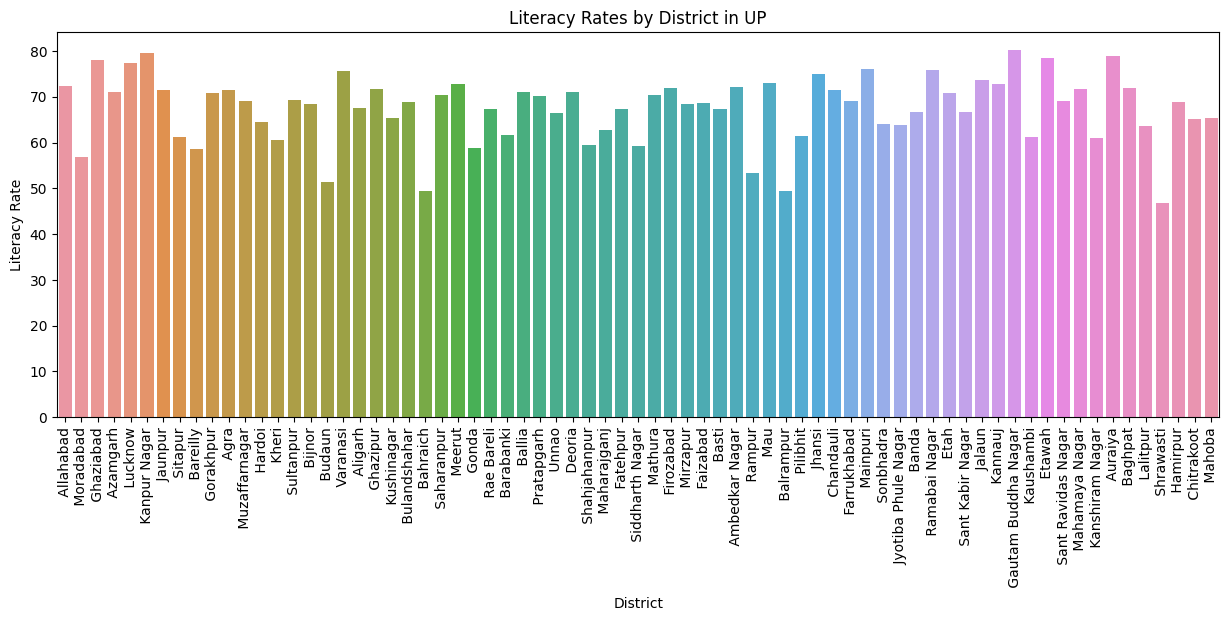

In [7]:
#Plot all literacy percentage of each district 

plt.figure(figsize=(15, 5))
sns.barplot(x='District', y='Literacy', data=Districts_of_UP)
plt.xticks(rotation=90)
plt.title('Literacy Rates by District in UP')
plt.xlabel('District')
plt.ylabel('Literacy Rate')





Text(0, 0.5, 'Literacy Rate')

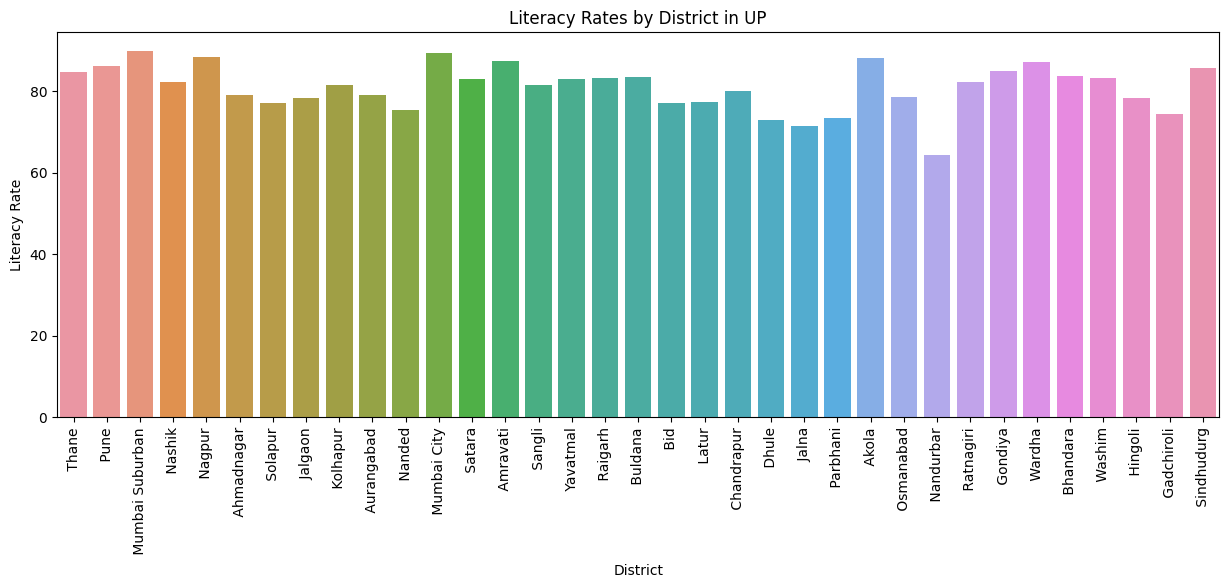

In [8]:
plt.figure(figsize=(15, 5))
sns.barplot(x='District', y='Literacy', data=Districts_of_MH)
plt.xticks(rotation=90)
plt.title('Literacy Rates by District in UP')
plt.xlabel('District')
plt.ylabel('Literacy Rate')


## Section 1: Sampling

We then extract districts from Uttar Pradesh (UP) and Maharashtra (MH) and create new dataframes. A random sample of 20 districts is taken from each state for further analysis.

In [9]:
#Random sample of 20 districts from each state

Sampled_districts_UP = Districts_of_UP.sample(n=20, replace = True, random_state=13490)
Sampled_districts_MH = Districts_of_MH.sample(n=20, replace = True, random_state=39652)

In [10]:
#Mean literacy of each sample and difference between them 

Sample_Mean_UP = Sampled_districts_UP['Literacy'].mean()
Sample_Mean_MH = Sampled_districts_MH['Literacy'].mean()
Difference = Sample_Mean_MH - Sample_Mean_UP 

In [11]:
print(f"The mean literacy rate of samples of MH {Sample_Mean_MH}")
print(f"The mean literacy rate of samples of UP {Sample_Mean_UP}")
print(f"The difference in literacy rate of each group of sample is {Difference}")

The mean literacy rate of samples of MH 81.99350000000001
The mean literacy rate of samples of UP 68.2595
The difference in literacy rate of each group of sample is 13.734000000000009


Samples of `Maharashtra` has a mean district literacy rate of about 81.9%, while `Uttar Pradesh` has a mean district literacy rate of about 68.2%.

Based on the sample data, the observed difference between the mean district literacy rates of `Maharashtra` and `Uttar Pradesh` is 13.73 percentage points (81.9% - 68.2%).

At this point, it might be tempted to conclude that `Maharashtra` has a higher overall literacy rate than `Uttar Pradesh`. However, due to sampling variability, this observed difference might simply be due to chance, rather than an actual difference in the corresponding population means. A hypothesis test can help you determine whether or not your results are statistically significant. 

## Section 2: Conduct hypothesis test 

#### Steps to conduct hpothesis test 

1.   State the null hypothesis and the alternative hypothesis.
2.   Choose a significance level.
3.   Find the p-value. 
4.   Reject or fail to reject the null hypothesis.

#### Step 1: State the null hypothesis and the alternative hypothesis

In this hypothesis test, the null hypothesis states that there is no difference between the means of your two group of sample. The alternative hypothesis states the contrary claim: there is a difference between the means of your two groups. 

$H_0$ denotes the null hypothesis and $H_A$ denotes the alternative hypothesis.

*   $H_0$: There is no difference in the mean district literacy rates between `Maharashtra` and `Uttar Pradesh`
*   $H_A$: There is a difference in the mean district literacy rates between `Maharashtra` and `Uttar Pradesh`

#### Step 2: Choose a significance level

The **significance level** is the threshold at which you will consider a result statistically significant. This is the probability of rejecting the null hypothesis when it is true. It is recommended to use the standard level of 5%, or 0.05. 

#### Step 3: Find the p-value

Based on the sample data, the difference between the mean district literacy rates of `Maharashtra` and `Uttar Pradesh` is 13.7 percentage points. The null hypothesis claims that this difference is due to chance. The p-value is the probability of observing an absolute difference in sample means that is 13.7 or greater *if* the null hypothesis is true.

In [12]:
#Two-sample t-test

stat, pvalue = stats.ttest_ind(a=Sampled_districts_UP['Literacy'], b=Sampled_districts_MH['Literacy'], equal_var=False)

In [13]:
print(f"The p-value of the hypothesis test is {pvalue} and its value in percentage is {pvalue*100}%")

The p-value of the hypothesis test is 2.0716886447559053e-07 and its value in percentage is 2.0716886447559053e-05%


#### Step 4: Reject or fail to reject the null hypothesis

*   If the p-value is less than the significance level, you can conclude that there is a statistically significant difference in the mean district literacy rates between `Maharashtra` and `Uttar Pradesh`. In other words, you will reject the null hypothesis $H_0$.
*   If the p-value is greater than the significance level, you can conclude that there is *not* a statistically significant difference in the mean district literacy rates between `Maharashtra` and `Uttar Pradesh`. In other words, you will fail to reject the null hypothesis $H_0$.


p-value of 0.00000020, or 0.00002%, is less than the significance level of 0.05, or 5%. Therefore, you will *reject* the null hypothesis and conclude that there is a statistically significant difference between the mean district literacy rates of the two states: `Maharashtra` and `Uttar Pradesh`. 

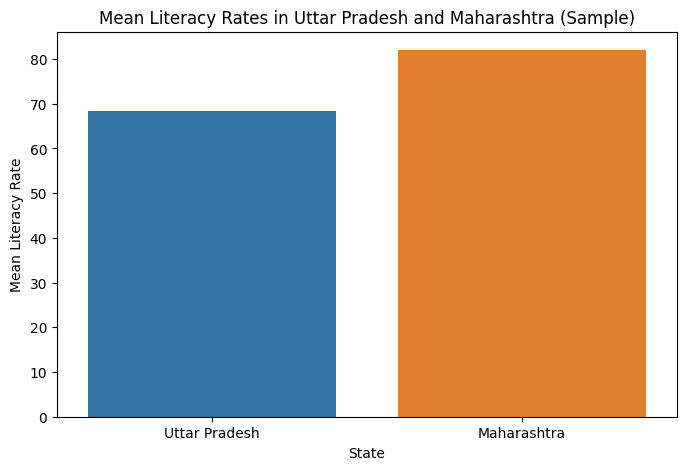

In [15]:
# Section 3: Visualization of the Results

# Visualizing the difference in mean literacy rates
plt.figure(figsize=(8, 5))
sns.barplot(x=['Uttar Pradesh', 'Maharashtra'], y=[Sample_Mean_UP, Sample_Mean_MH])
plt.title('Mean Literacy Rates in Uttar Pradesh and Maharashtra (Sample)')
plt.xlabel('State')
plt.ylabel('Mean Literacy Rate')
plt.show()




In [16]:
# Section 4: Conclusion and Reporting

# Decision based on the p-value
alpha = 0.05
if pvalue < alpha:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

# Summary Report
print("Summary Report:")
print(f"The mean literacy rate of the samples from Uttar Pradesh is: {Sample_Mean_UP:.2f}%")
print(f"The mean literacy rate of the samples from Maharashtra is: {Sample_Mean_MH:.2f}%")
print(f"The observed difference in mean literacy rates between Maharashtra and Uttar Pradesh is: {Difference:.2f} percentage points")
print(f"The p-value of the hypothesis test is: {pvalue:.10f} ({pvalue*100:.5f}%)")
print(f"Decision: {decision}")



Summary Report:
The mean literacy rate of the samples from Uttar Pradesh is: 68.26%
The mean literacy rate of the samples from Maharashtra is: 81.99%
The observed difference in mean literacy rates between Maharashtra and Uttar Pradesh is: 13.73 percentage points
The p-value of the hypothesis test is: 0.0000002072 (0.00002%)
Decision: Reject the null hypothesis


## Conclusion

This analysis will help the Department of Education decide how to distribute government resources. Since there is a statistically significant difference in mean district literacy rates, the state with the lower literacy rate, `Uttar Pradesh`, will likely receive more resources to improve literacy. 